<a href="https://colab.research.google.com/github/AguaClara/ram_pump/blob/master/Fall%202019/data_analysis_colab/flow_analysis_total_nov27.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
!pip install aguaclara

In [0]:
import aguaclara.research.procoda_parser as pp
import matplotlib.pyplot as plt
import numpy as np
import aguaclara.core.constants as c
import aguaclara.core.physchem as pc
import pandas as pd
from aguaclara.research.peristaltic_pump import vol_per_rev_LS
from aguaclara.core.units import unit_registry as u
from scipy import integrate
from aguaclara.research.peristaltic_pump import flow_rate
from aguaclara.core.units import u
import aguaclara as ac
from scipy import integrate

In [0]:
nov27 = 'https://raw.githubusercontent.com/AguaClara/ram_pump/master/Fall%202019/datalog/nov27.tsv'
note = pp.notes(nov27)

In [0]:

first_row = np.array([]);
first_row = note.iloc[:,0].index.tolist()
start = np.array([])
end = np.array([])
num_turn = 0; #starting number of turns
turn = np.array([])
for i in range(0,len(first_row)-1,2):
  start = np.append(start,first_row[i])
  end = np.append(end,first_row[i+1])
  turn = np.append(turn,num_turn)
  num_turn = num_turn+1
a = np.empty(len(start));
a.fill(100);
start = np.add(start,a)
end = np.subtract(end,a)
start = np.array(start, dtype='int')
end = np.array(end, dtype='int')


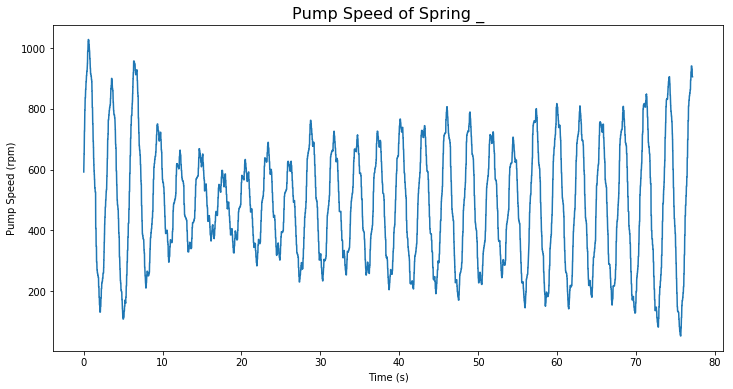

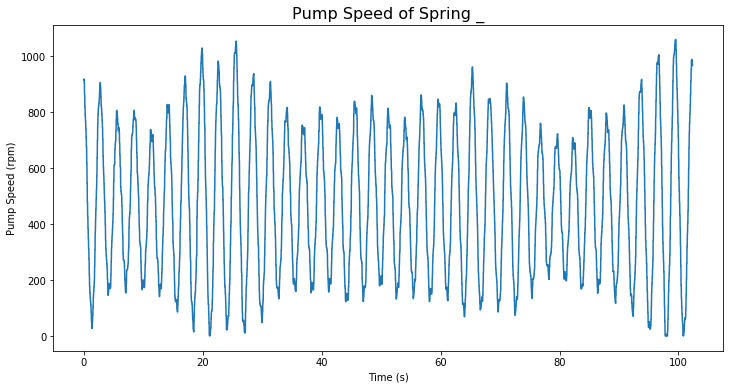

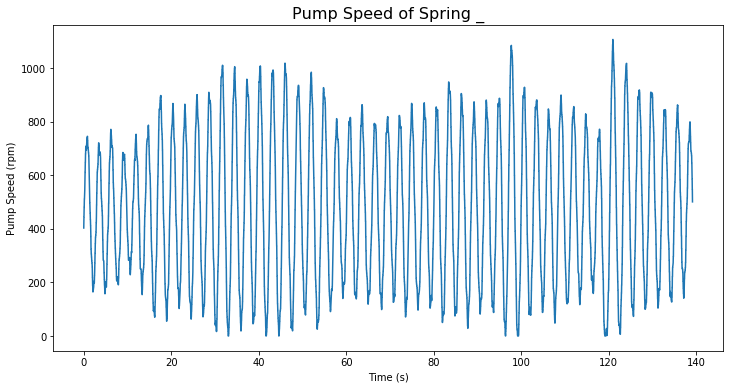

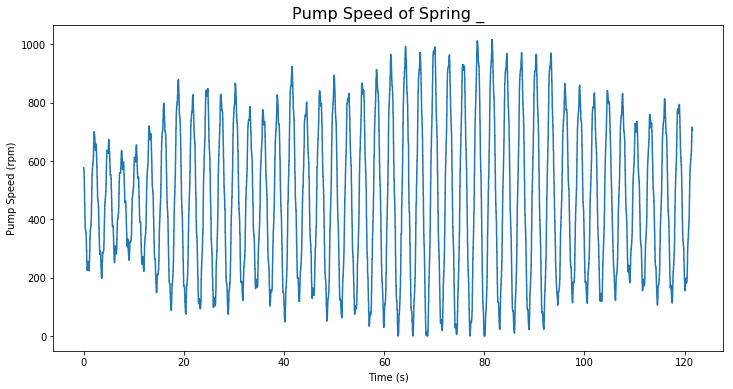

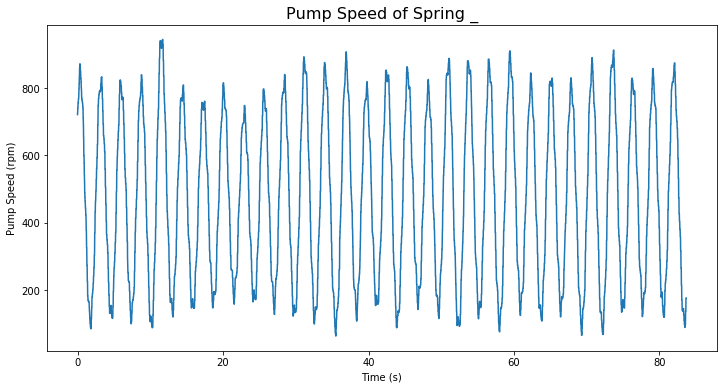

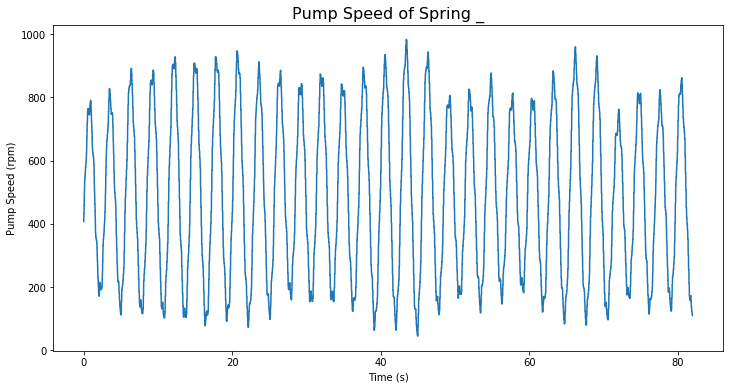

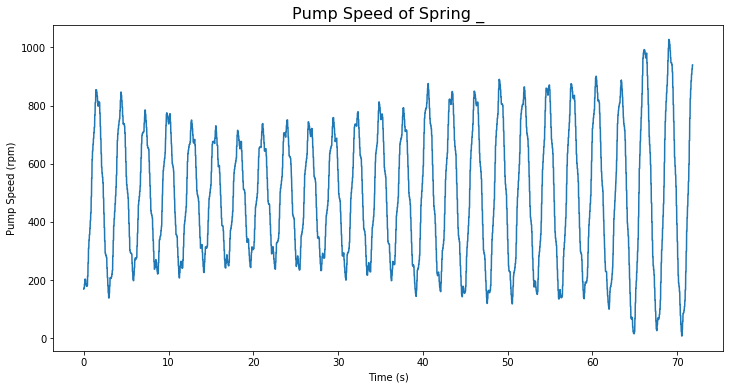

In [0]:
#figure out if theres a way to put start end index in an array
#check procoda parser documentation
flow_tot = np.array([])
rate_tot = np.array([])
dur_tot = np.array([])
for j in range (0,len(start)):
  time = (pp.column_of_time(nov27,start[j],end[j])).to(u.s)
  airchamber = -pp.column_of_data(nov27, start[j], 2, end[j], 'cm')
  pump = pp.column_of_data(nov27, start[j], 4, end[j], 'rpm')
  plt.figure(figsize=(12,6))
  #plt.plot(time,airchamber,'-', label='Air Chamber')
  plt.plot(time,pump*1200, '-', label = 'Pump Speed (rpm)')
  plt.title('Pump Speed of Spring _', fontsize=16)
  plt.xlabel('Time (s)')
  plt.ylabel('Pump Speed (rpm)')
  #plt.legend()
  plt.show()
  rate = np.array([])
  deltatime = time[len(time)-1]-time[0];
  #for loop or vector calc
  for k in range(0,len(time)-1):
    rate = np.append(rate, ac.flow_rate(ac.vol_per_rev_LS(17),pump[k]*2*600))
  rate_avg =   np.average(rate)
  flow = integrate.simps(rate, x=None, dx=deltatime, axis=-1, even='avg')
  flow_tot = np.append(flow_tot,flow)
  rate_tot = np.append(rate_tot,rate_avg)
  dur_tot = np.append(dur_tot, deltatime)



In [0]:
turn = np.array(turn, dtype='int')
dur_tot = dur_tot
flow_tot = flow_tot
rate_tot = rate_tot
for m in range(0, len(dur_tot)):
  total = "After {} turn, the total flow is {} in {}, and the average flow rate is {}."
  print(total.format(turn[m], flow_tot[m], dur_tot[m], rate_tot[m]))

After 0 turn, the total flow is 22553224.968897935 in 77.19455520000729, and the average flow rate is 22.74604732931795.
After 1 turn, the total flow is 38536295.84584953 in 102.35877120000296, and the average flow rate is 22.11358339013341.
After 2 turn, the total flow is 71460645.85833783 in 139.10999616000694, and the average flow rate is 22.206879196561207.
After 3 turn, the total flow is 53460942.105273694 in 121.57111583999907, and the average flow rate is 21.73323291511401.
After 4 turn, the total flow is 25784488.433278337 in 83.67550559999408, and the average flow rate is 22.16408882399292.
After 5 turn, the total flow is 25603598.820412237 in 82.00160063999817, and the average flow rate is 22.861684174025008.
After 6 turn, the total flow is 19636043.554916177 in 71.79712992000269, and the average flow rate is 22.865683311174788.


[22.74604733 22.11358339 22.2068792  21.73323292 22.16408882 22.86168417
 22.86568331]


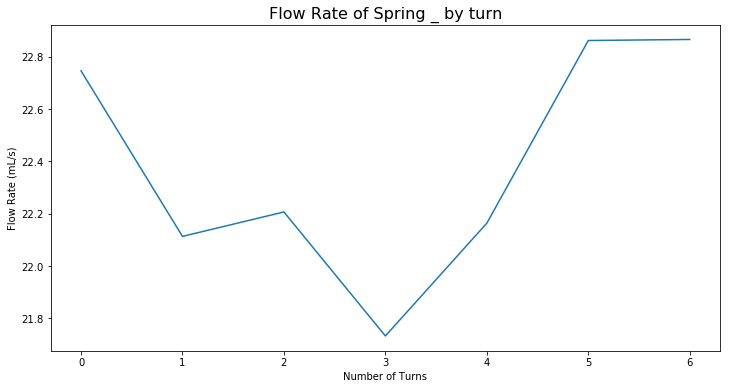

In [0]:
print(rate_tot)
plt.figure(figsize=(12,6))
plt.plot(turn,rate_tot, '-')
plt.title('Flow Rate of Spring _ by turn', fontsize=16)
plt.xlabel('Number of Turns')
plt.ylabel('Flow Rate (mL/s)')
plt.show()